##Diabetes Prediction
Machine learning as a tool for early diabetes detection: By delving into complex medical data, machine learning algorithms might empower us to identify individuals at risk of developing diabetes before it's too late.

##About Project


1. Using data to predict diabetes: This project aims to develop a tool that can analyze various medical factors like age, blood sugar, and BMI to determine if someone is likely to have diabetes.

2. Uncovering patterns in medical data: We're building a model to automatically classify individuals as having diabetes or not based on information like blood pressure, weight, and family history.

3. Machine learning for diabetes diagnosis: This project explores whether analyzing data points such as glucose levels and body mass index can help predict the presence of diabetes.

4. Classifying diabetes risk: Our goal is to create a system that uses medical information like age and insulin levels to assess an individual's risk of developing diabetes.

5. Predicting diabetes with medical data: This project investigates the potential of using factors like blood pressure and family history to identify individuals at risk of diabetes through a machine learning model.


##About Dataset
*  The dataset includes various health factors like the number of pregnancies, blood sugar levels after a glucose test, and family history, to predict the presence of diabetes (0 meaning no diabetes, 1 meaning diabetes).

*   We're looking at features like past pregnancies, blood pressure, and body mass index, along with genetic factors, to see if they can help identify individuals with diabetes (labeled as 0 or 1).

1. Pregnancies : Number of times woman has been pregnant
2. Glucose : Plasma Glucose Concentration of two hours in an oral glucose
3. Blood Pressure : Diastollic Blood Pressure (in mmhg)
4. Skin Thickness Triceps Skin Fold Thickness (in mm)
5. Insulin : two hour serum insulin (mu U/ml)
6. Body Mass Index : in (weight in kg/height in m)^2
7. Age : (Years)
8. Diabetes Pedigree Function : Scores likelihood of diabetes based on family history
9. Outcome : 1 (has diabetes) and 0 (does not has diabetes)

#1.Importing Libraries

In [300]:
import pandas as pd #processing data to read csv
import numpy as np #calculation library
import matplotlib.pyplot as plt #plotting charts
import seaborn as sns #used for visualizing data
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix #import to visualize outliers
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

#2.Loading Datasets

Understand the informations about data set (generally)

In [301]:
df_diabetes=pd.read_csv("/content/drive/MyDrive/Diabetes Pima/diabetes.csv")
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [302]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [303]:
df_diabetes.shape

(768, 9)

In [304]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [305]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#Summary Information (Percentile each features):
* Count = Number of nom-empty rows
* Mean = Mean value of feature
* std = Standard deviation of value
* min = minimum value
* max = maximum value


#NG Data (['Pregnancies','Glucose','BloodPressure',	'SkinThickness',	'Insulin	']
When observing the data, we noticed some minimum values (like zero blood pressure) that are medically impossible. We'll replace them with either the median or mean, depending on the data distribution for each column. Additionally, we have to handle outliers with extremely high insulin levels. These outliers need special attention during analysis.

#3.Dropping duplicate, null, and zero values

In [306]:
df_diabetes.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [307]:
if df_diabetes.empty:
  print("DataFrame is empty")
else:
  duplicated_diabetes=df_diabetes.duplicated()
  print(duplicated_diabetes)

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool


In [308]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [309]:
zero_counts = df_diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']].eq(0).sum()

print(f"Number of zero values in each column:\n{zero_counts}")


Number of zero values in each column:
Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
dtype: int64


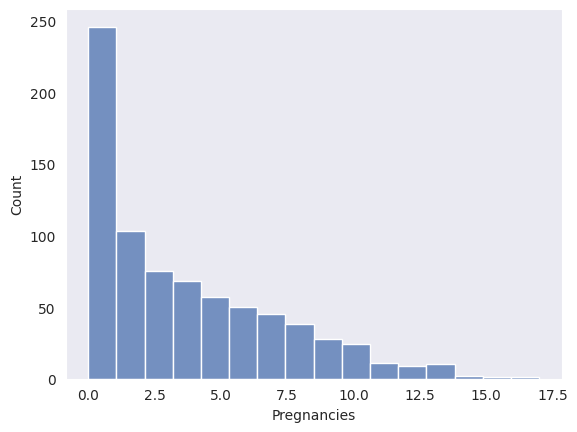

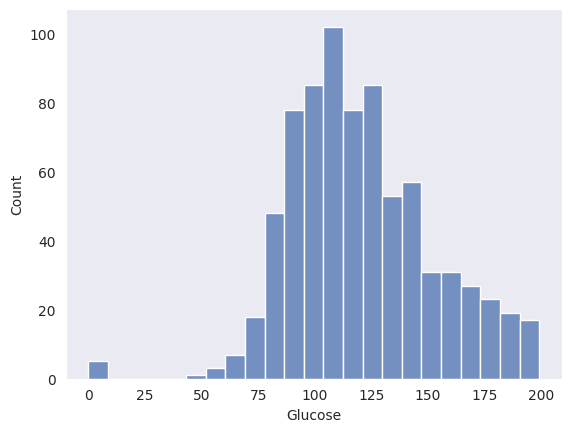

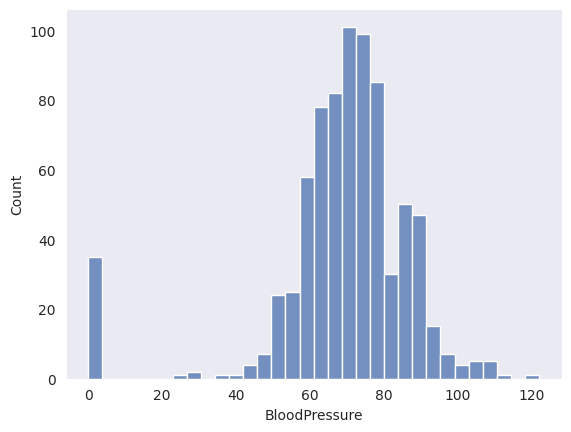

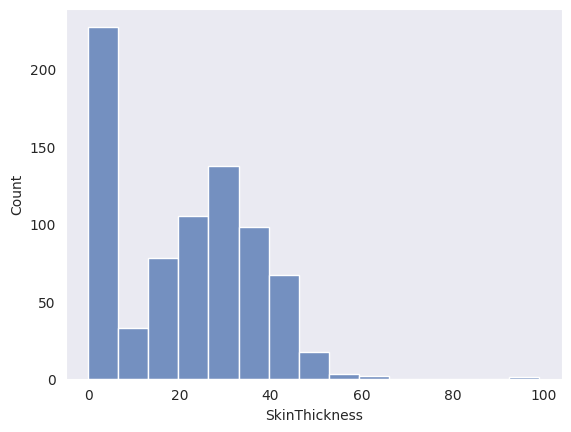

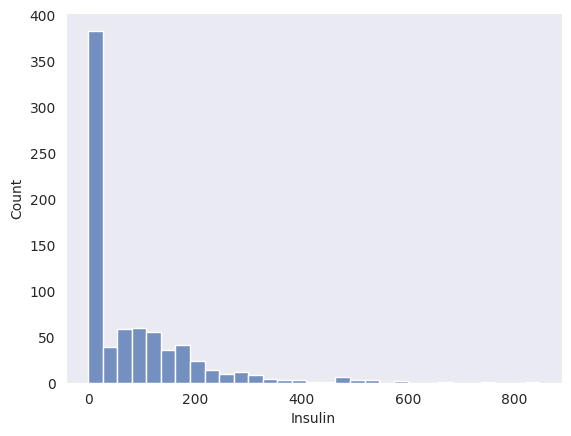

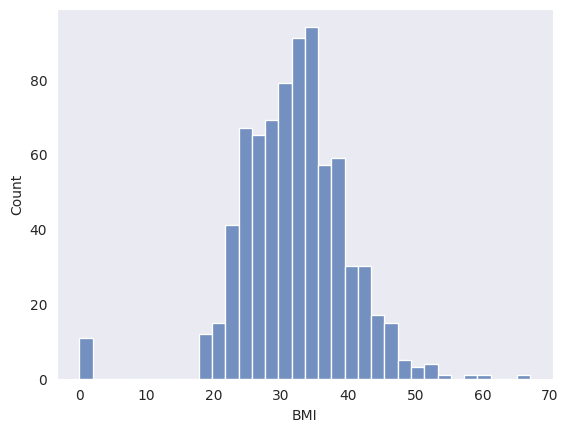

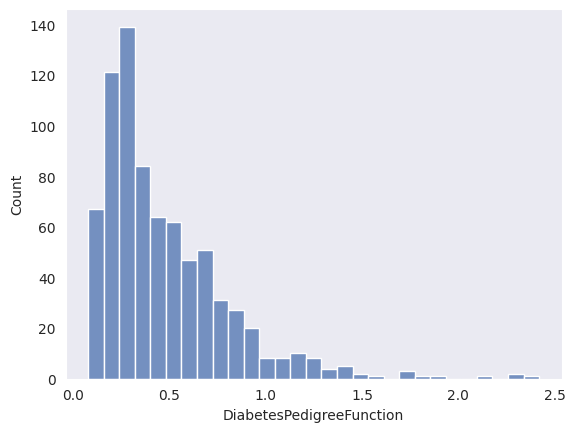

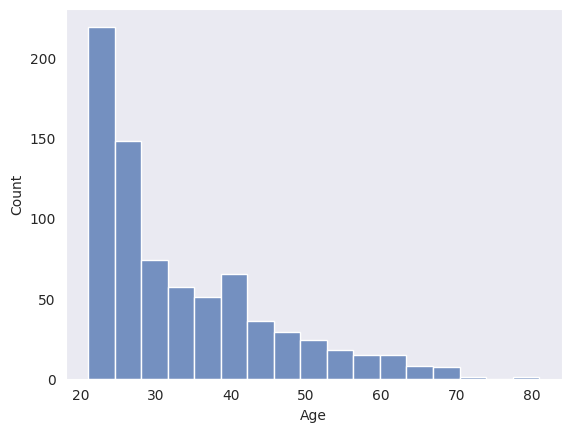

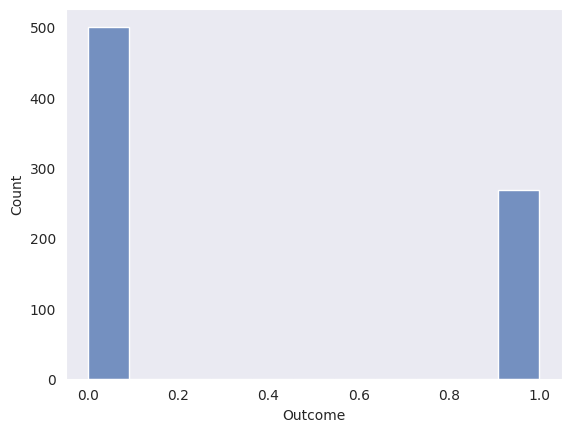

In [310]:
# Loop through the desired columns
desired_columns =df_diabetes
for col in desired_columns:
    sns.histplot(data=df_diabetes, x=col)  # Basic histogram

    # Apply customizations as needed
    # Example: Set number of bins and title
    # sns.histplot(data=df_diabetes, x=col, bins=10, title=f"Histogram of {col}")

    # Show the plot
    plt.show()


Analysis of 5 columns revealed the presence of zero values. However, further investigation determined that these values are valid for certain columns: Age and DiabetesPedigreeFunction cannot be zero by definition, and observations of zero pregnancies were confirmed through descriptive statistics analysis (df.describe). Therefore, replacement of zero values is not necessary for these columns.

##Analysis of 5 columns identified the presence of zero values.
* Several columns exhibit skewed distributions, making the median a more robust choice for imputing zero values compared to the mean, which is susceptible to outlier influence. This choice aligns with the observed normality of Glucose and Blood Pressure, where mean imputation is suitable. Conversely, SkinThickness, Insulin, and BMI display skewness, favoring the less outlier-sensitive median for imputation.

##4.Replacing Zero Values Using Median and Mean:

In [311]:
df_diabetes['BMI']=df_diabetes['BMI'].replace(0,df_diabetes['BMI'].median())#impute using median for skewed distribution
df_diabetes['Insulin']=df_diabetes['Insulin'].replace(0,df_diabetes['Insulin'].median())#impute using median for skewed distribution
df_diabetes['SkinThickness']=df_diabetes['SkinThickness'].replace(0,df_diabetes['SkinThickness'].median())#impute using median for skewed distribution
df_diabetes['Glucose']=df_diabetes['Glucose'].replace(0,df_diabetes['Glucose'].mean())#impute using mean for normal distribution
df_diabetes['BloodPressure']=df_diabetes['BloodPressure'].replace(0,df_diabetes['BloodPressure'].mean())#impute using mean for normal distribution

In [312]:
print(df_diabetes.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.681605      72.254807      27.334635   94.652344   
std       3.369578   30.436016      12.115932       9.229014  105.547598   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      23.000000   30.500000   
50%       3.000000  117.000000      72.000000      23.000000   31.250000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.450911                  0.471876   33.240885    0.348958  
std      6.875366                  0.331329   11.760232    0.476951  
min     18.200000                  

##5.Visualize Data

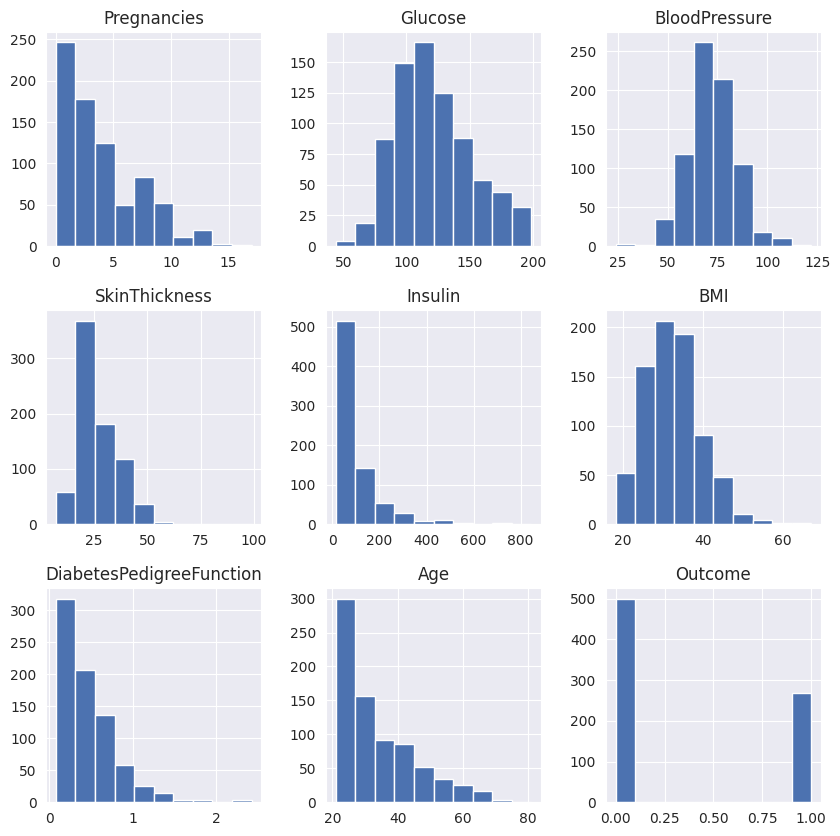

In [313]:
df_diabetes.hist(bins=10,figsize=(10,10),)
plt.show()

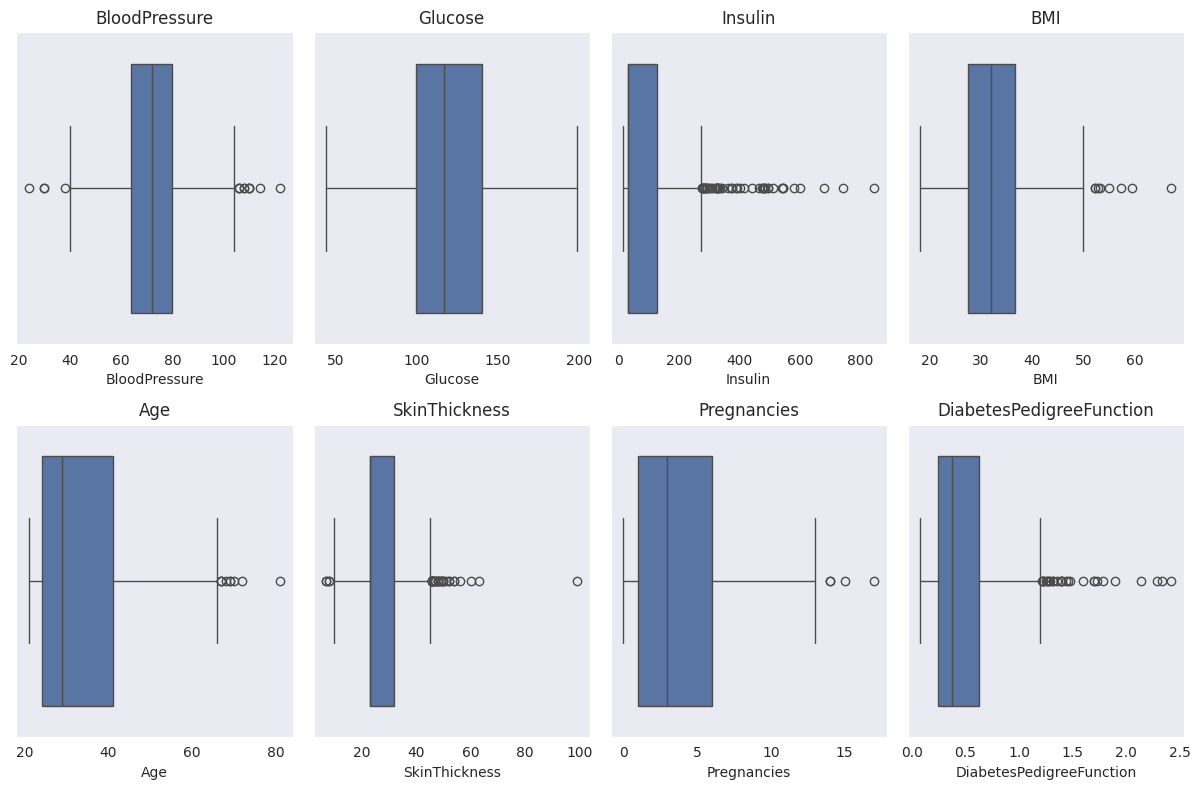

In [314]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_diabetes' holds your data

# Set custom figure size and style
plt.figure(figsize=(12, 8))  # Adjust size if needed

# Loop to create boxplots for each feature
features = ['BloodPressure', 'Glucose', 'Insulin', 'BMI', 'Age', 'SkinThickness', 'Pregnancies', 'DiabetesPedigreeFunction']
rows, cols = 2, 4  # Adjust rows and columns for layout

for i, col in enumerate(features):
    plt.subplot(rows, cols, i + 1)  # Use subplot indexing
    sns.boxplot(x=col, data=df_diabetes)
    plt.title(col)  # Add informative titles

# Adjust layout and spacing
plt.tight_layout()  # Prevent overlapping elements

# Optional customization: Rotate x-axis labels for readability
# plt.xticks(rotation=45)  # Uncomment if labels overlap

plt.show()


Analyzing the data's distribution and pinpointing outliers is crucial for accurate statistical analysis. Outliers, being unusual values, can skew results and invalidate assumptions underlying statistical tests. While removing them might seem tempting, it leads to data loss. Therefore, we'll resort to alternative techniques like scaling and transforming the data to handle outliers without discarding valuable information.

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_diabetes,figsize=(20,20))
plt.show()

Visualizing relationships between variables using techniques like these plots allows us to draw conclusions about their interactions. For instance, the plot of pregnancies versus insulin reveals a potential inverse relationship, suggesting that women with higher pregnancy counts may have lower insulin levels.

In [ ]:
corr_diabetes=df_diabetes.corr()
sns.heatmap(corr_diabetes,annot=True,cmap='Greens',fmt=".2f")
plt.show()

Heatmap used for find Correlation Coefficient quantifies the linear association between two variables. Ranging from -1 (perfectly negative) to +1 (perfectly positive), it measures the strength of this relationship. A value of 0 indicates no linear association.

Heat maps represent data visually using color intensity. Analyzing the correlations in the "Outcome" row, we can understand that Glucose, BMI, and Age exhibit the strongest correlations. Conversely, Blood Pressure, Insulin, and DiabetesPedigreeFunction show minimal correlations, suggesting they may not contribute significantly to the model and could be considered for removal.

In [ ]:
df_diabetes_drop=df_diabetes.drop(['BloodPressure','DiabetesPedigreeFunction','Insulin'],axis='columns')

##6.Balancing

In [ ]:
sns.countplot(x='Outcome',data=df_diabetes)

In [ ]:
#changing the zeros to nulls
df_diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Initialize the imputer
imputer = KNNImputer(n_neighbors=3)

# Impute the null values
imputed_df = pd.DataFrame(imputer.fit_transform(df_diabetes), columns=df_diabetes.columns)

In [ ]:
class_counts = imputed_df['Outcome'].value_counts()

# Identify the majority and minority classes
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

# Determine the number of instances to delete from the majority class
num_instances_to_delete = class_counts[majority_class] - class_counts[minority_class]

# Randomly select instances from the majority class to delete
majority_indices = imputed_df[imputed_df['Outcome'] == majority_class].index
delete_indices = np.random.choice(majority_indices, size=num_instances_to_delete, replace=False)

# Remove the selected instances from the dataset
balanced_df = imputed_df.drop(delete_indices)

# Print the class distribution after balancing
print("Class distribution after balancing:")
print(balanced_df['Outcome'].value_counts())

In [ ]:
sns.countplot(x='Outcome',data=balanced_df)

The number of samples in the majority class is significantly higher than those in the minority class, hindering model performance. Therefore, I employ undersampling by randomly removing majority class samples until a desired balance is achieved.

In [ ]:
#Scaling Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scale the columns of the DataFrame
scaled_diabetes = scaler.fit_transform(balanced_df)

# Create a new DataFrame with the scaled data
scaled_diabetes = pd.DataFrame(scaled_diabetes, columns=balanced_df.columns)

In [ ]:
corrmat=scaled_diabetes.corr()
sns.heatmap(corrmat, annot=True)

##7.Split Data Frame

In [ ]:
x = scaled_diabetes.drop('Outcome', axis=1)
y = scaled_diabetes['Outcome']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=42)
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
x_test.shape,y_test.shape

##8.1.Logistic Regression

In [ ]:
reg = LogisticRegression()
reg.fit(x_train,y_train)
lr_pred=reg.predict(x_test)

In [ ]:
print("Classification Report :",classification_report(y_test,lr_pred))
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Precision:",precision_score(y_test,lr_pred))
print("Recall:",recall_score(y_test,lr_pred))
print("F1:",f1_score(y_test,lr_pred))
total_lr=(accuracy_score(y_test, lr_pred)+precision_score(y_test,lr_pred)+recall_score(y_test,lr_pred)+f1_score(y_test,lr_pred))/0.4
print("Total Value Log Regression:",total_lr,'/10')
acc_lr=accuracy_score(y_test, lr_pred)
cm = confusion_matrix(y_test, lr_pred)


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and dt_prediction

# Calculate confusion matrix
cm = confusion_matrix(y_test, lr_pred)

# Create customized colormap (if desired)
num_classes = cm.shape[0]  # Get the number of classes
cmap = sns.color_palette("Greens", n_colors=num_classes)  # Use 'Greens' as a starting point
# You can replace 'Greens' with another color palette from Seaborn, e.g., 'Blues', 'PuBu', etc.
# You can also create your own custom colormap using matplotlib or other libraries.

# Create the heatmap with appropriate labels and formatting
fig, ax = plt.subplots()
sns.heatmap(
    cm,
    annot=True,  # Annotate cells with values
    cmap=cmap,  # Apply the customized colormap
    fmt='d',  # Format cell values as integers
    cbar=False,  # Suppress automatic colorbar
    xticklabels=range(num_classes),
    yticklabels=range(num_classes),
    ax=ax,  # Ensure heatmap is plotted on the provided axes
)

# Add explicit colorbar with customizable label
colorbar = fig.colorbar(ax.collections[0], label='Confusion Matrix')
colorbar.ax.set_title('Number of Cases')  # Customize colorbar title

# Add descriptive title to the chart
ax.set_title('Confusion Matrix Log Reg')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Set labels for axes and colorbar
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Display the confusion matrix
plt.tight_layout()  # Adjust spacing for clean layout
plt.show()


##8.2.Decision Tree Method (20% Data for Train : 80% Data for Test)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
dt=DecisionTreeClassifier(random_state=42)

params = {
    "max_depth": [5, 10, 20,25],
    "min_samples_leaf": [10, 20, 50],
    "criterion": ["gini", "entropy"],
}

for max_depth in params["max_depth"]:
    for min_samples_leaf in params["min_samples_leaf"]:
        for criterion in params["criterion"]:
            clf = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                criterion=criterion,
            )
            clf.fit(x_train, y_train)
            score = clf.score(x_test, y_test)
            print(f"max_depth={max_depth}, min_samples_leaf={min_samples_leaf}, criterion={criterion}, score={score}")


In [ ]:
grid_search=GridSearchCV(estimator=dt,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring="accuracy")
best_mod=grid_search.fit(x_train,y_train)
dt_prediction=best_mod.predict(x_test)

In [ ]:
print("Classification Report :",classification_report(y_test,dt_prediction))
print("Accuracy:", accuracy_score(y_test, dt_prediction))
print("Precision:",precision_score(y_test,dt_prediction))
print("Recall:",recall_score(y_test,dt_prediction))
print("F1:",f1_score(y_test,dt_prediction))
total_dt_80=(accuracy_score(y_test, dt_prediction)+precision_score(y_test,dt_prediction)+recall_score(y_test,dt_prediction)+f1_score(y_test,dt_prediction))/0.4
print("Total Value DT 80:",total_dt_80,'/10')
acc_dt_80= accuracy_score(y_test, dt_prediction)
cm = confusion_matrix(y_test, dt_prediction)


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and dt_prediction

# Calculate confusion matrix
cm = confusion_matrix(y_test, dt_prediction)

# Create customized colormap (if desired)
num_classes = cm.shape[0]  # Get the number of classes
cmap = sns.color_palette("Greens", n_colors=num_classes)  # Use 'Greens' as a starting point
# You can replace 'Greens' with another color palette from Seaborn, e.g., 'Blues', 'PuBu', etc.
# You can also create your own custom colormap using matplotlib or other libraries.

# Create the heatmap with appropriate labels and formatting
fig, ax = plt.subplots()
sns.heatmap(
    cm,
    annot=True,  # Annotate cells with values
    cmap=cmap,  # Apply the customized colormap
    fmt='d',  # Format cell values as integers
    cbar=False,  # Suppress automatic colorbar
    xticklabels=range(num_classes),
    yticklabels=range(num_classes),
    ax=ax,  # Ensure heatmap is plotted on the provided axes
)

# Add explicit colorbar with customizable label
colorbar = fig.colorbar(ax.collections[0], label='Confusion Matrix')
colorbar.ax.set_title('Number of Cases')  # Customize colorbar title

# Add descriptive title to the chart
ax.set_title('Confusion Matrix DT 80')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Set labels for axes and colorbar
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Display the confusion matrix
plt.tight_layout()  # Adjust spacing for clean layout
plt.show()


##8.3.Decision Tree Method (67% Data for Train : 33% Data for Testing)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=42)

In [ ]:
dt=DecisionTreeClassifier(random_state=42)

params = {
    "max_depth": [5, 10, 20,25,30],
    "min_samples_leaf": [10, 20, 50,100,120],
    "criterion": ["gini", "entropy"],
}

for max_depth in params["max_depth"]:
    for min_samples_leaf in params["min_samples_leaf"]:
        for criterion in params["criterion"]:
            clf = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_leaf=min_samples_leaf,
                criterion=criterion,
            )
            clf.fit(x_train, y_train)
            score = clf.score(x_test, y_test)
            print(f"max_depth={max_depth}, min_samples_leaf={min_samples_leaf}, criterion={criterion}, score={score}")


In [ ]:
grid_search=GridSearchCV(estimator=dt,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring="accuracy")
best_mod=grid_search.fit(x_train,y_train)
dt_prediction=best_mod.predict(x_test)

In [ ]:
print("Classification Report :",classification_report(y_test,dt_prediction))
print("Accuracy:", accuracy_score(y_test, dt_prediction))
print("Precision:",precision_score(y_test,dt_prediction))
print("Recall:",recall_score(y_test,dt_prediction))
print("F1:",f1_score(y_test,dt_prediction))
total_dt_67=(accuracy_score(y_test, dt_prediction)+precision_score(y_test,dt_prediction)+recall_score(y_test,dt_prediction)+f1_score(y_test,dt_prediction))/0.4
print("Total Value DT 67:",total_dt_67,'/10')
acc_dt_67=accuracy_score(y_test, dt_prediction)
cm = confusion_matrix(y_test, dt_prediction)


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and dt_prediction

# Calculate confusion matrix
cm = confusion_matrix(y_test, dt_prediction)

# Create customized colormap (if desired)
num_classes = cm.shape[0]  # Get the number of classes
cmap = sns.color_palette("Greens", n_colors=num_classes)  # Use 'Greens' as a starting point
# You can replace 'Greens' with another color palette from Seaborn, e.g., 'Blues', 'PuBu', etc.
# You can also create your own custom colormap using matplotlib or other libraries.

# Create the heatmap with appropriate labels and formatting
fig, ax = plt.subplots()
sns.heatmap(
    cm,
    annot=True,  # Annotate cells with values
    cmap=cmap,  # Apply the customized colormap
    fmt='d',  # Format cell values as integers
    cbar=False,  # Suppress automatic colorbar
    xticklabels=range(num_classes),
    yticklabels=range(num_classes),
    ax=ax,  # Ensure heatmap is plotted on the provided axes
)

# Add explicit colorbar with customizable label
colorbar = fig.colorbar(ax.collections[0], label='Confusion Matrix')
colorbar.ax.set_title('Number of Cases')  # Customize colorbar title

# Add descriptive title to the chart
ax.set_title('Confusion Matrix DT 67')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Set labels for axes and colorbar
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Display the confusion matrix
plt.tight_layout()  # Adjust spacing for clean layout
plt.show()


##8.4.K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
# Initialize KNN model
knn_model= KNeighborsClassifier()

# Define range of number of neighbors
num_neighbors = list(range(5,20))

# Define values for power parameter
p=[1,2,3]

# Define weight functions
weights = ['uniform', 'distance']

# Define distance metrics
metrics = ['euclidean', 'manhattan']

hyperparameters = dict(n_neighbors=num_neighbors, p=p,weights=weights,metric=metrics)

# Define cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# Perform grid search
grid_search = GridSearchCV(estimator=knn_model, param_grid=hyperparameters, cv=cv, scoring='f1',error_score=0)

In [ ]:
best_model = grid_search.fit(x_train,y_train)
pred_diabetes = best_model.predict(x_test)

In [ ]:
print("Classification Report :",classification_report(y_test,pred_diabetes))
print("Accuracy:", accuracy_score(y_test, pred_diabetes))
print("Precision:",precision_score(y_test,pred_diabetes))
print("Recall:",recall_score(y_test,pred_diabetes))
print("F1:",f1_score(y_test,pred_diabetes))
total_knn=(accuracy_score(y_test, pred_diabetes)+precision_score(y_test,pred_diabetes)+recall_score(y_test,pred_diabetes)+f1_score(y_test,pred_diabetes))/0.4
print("Total Value KNN:",total_knn,'/10')
acc_kn=accuracy_score(y_test, pred_diabetes)
cm = confusion_matrix(y_test, pred_diabetes)

# Create customized colormap (if desired)
num_classes = cm.shape[0]  # Get the number of classes
cmap = sns.color_palette("Greens", n_colors=num_classes)  # Use 'Greens' as a starting point
# You can replace 'Greens' with another color palette from Seaborn, e.g., 'Blues', 'PuBu', etc.
# You can also create your own custom colormap using matplotlib or other libraries.

# Create the heatmap with appropriate labels and formatting
fig, ax = plt.subplots()
sns.heatmap(
    cm,
    annot=True,  # Annotate cells with values
    cmap=cmap,  # Apply the customized colormap
    fmt='d',  # Format cell values as integers
    cbar=False,  # Suppress automatic colorbar
    xticklabels=range(num_classes),
    yticklabels=range(num_classes),
    ax=ax,  # Ensure heatmap is plotted on the provided axes
)

# Add explicit colorbar with customizable label
colorbar = fig.colorbar(ax.collections[0], label='Confusion Matrix')
colorbar.ax.set_title('Number of Cases')  # Customize colorbar title

# Add descriptive title to the chart
ax.set_title('Confusion Matrix KNN')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Set labels for axes and colorbar
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Display the confusion matrix
plt.tight_layout()  # Adjust spacing for clean layout
plt.show()


##8.5.Random Forest 1800

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
best_model = grid_search.fit(x_train, y_train)
rf_pred=best_model.predict(x_test)

In [ ]:
print("Classification Report :",classification_report(y_test,rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:",precision_score(y_test,rf_pred))
print("Recall:",recall_score(y_test,rf_pred))
print("F1:",f1_score(y_test,rf_pred))
total_rf_1800=(accuracy_score(y_test, rf_pred)+precision_score(y_test,rf_pred)+recall_score(y_test,rf_pred)+f1_score(y_test,rf_pred))/0.4
print("Total Value Random Forest 1800:",total_rf_1800,'/10')
acc_rf_1800=accuracy_score(y_test, rf_pred)
cm = confusion_matrix(y_test, rf_pred)

# Create customized colormap (if desired)
num_classes = cm.shape[0]  # Get the number of classes
cmap = sns.color_palette("Greens", n_colors=num_classes)  # Use 'Greens' as a starting point
# You can replace 'Greens' with another color palette from Seaborn, e.g., 'Blues', 'PuBu', etc.
# You can also create your own custom colormap using matplotlib or other libraries.

# Create the heatmap with appropriate labels and formatting
fig, ax = plt.subplots()
sns.heatmap(
    cm,
    annot=True,  # Annotate cells with values
    cmap=cmap,  # Apply the customized colormap
    fmt='d',  # Format cell values as integers
    cbar=False,  # Suppress automatic colorbar
    xticklabels=range(num_classes),
    yticklabels=range(num_classes),
    ax=ax,  # Ensure heatmap is plotted on the provided axes
)

# Add explicit colorbar with customizable label
colorbar = fig.colorbar(ax.collections[0], label='Confusion Matrix')
colorbar.ax.set_title('Number of Cases')  # Customize colorbar title

# Add descriptive title to the chart
ax.set_title('Confusion Matrix Random Forest 1800')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Set labels for axes and colorbar
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Display the confusion matrix
plt.tight_layout()  # Adjust spacing for clean layout
plt.show()


##8.6.Random Forest 3600

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [3600]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
best_model = grid_search.fit(x_train, y_train)
rf_pred=best_model.predict(x_test)

In [ ]:
print("Classification Report :",classification_report(y_test,rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:",precision_score(y_test,rf_pred))
print("Recall:",recall_score(y_test,rf_pred))
print("F1:",f1_score(y_test,rf_pred))
total_rf_3600=(accuracy_score(y_test, rf_pred)+precision_score(y_test,rf_pred)+recall_score(y_test,rf_pred)+f1_score(y_test,rf_pred))/0.4
print("Total Value Random Forest 3600:",total_rf_3600,'/10')
acc_rf_3600=accuracy_score(y_test, rf_pred)
cm = confusion_matrix(y_test, rf_pred)

# Create customized colormap (if desired)
num_classes = cm.shape[0]  # Get the number of classes
cmap = sns.color_palette("Greens", n_colors=num_classes)  # Use 'Greens' as a starting point
# You can replace 'Greens' with another color palette from Seaborn, e.g., 'Blues', 'PuBu', etc.
# You can also create your own custom colormap using matplotlib or other libraries.

# Create the heatmap with appropriate labels and formatting
fig, ax = plt.subplots()
sns.heatmap(
    cm,
    annot=True,  # Annotate cells with values
    cmap=cmap,  # Apply the customized colormap
    fmt='d',  # Format cell values as integers
    cbar=False,  # Suppress automatic colorbar
    xticklabels=range(num_classes),
    yticklabels=range(num_classes),
    ax=ax,  # Ensure heatmap is plotted on the provided axes
)

# Add explicit colorbar with customizable label
colorbar = fig.colorbar(ax.collections[0], label='Confusion Matrix')
colorbar.ax.set_title('Number of Cases')  # Customize colorbar title

# Add descriptive title to the chart
ax.set_title('Confusion Matrix Random Forest 3600')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Set labels for axes and colorbar
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Display the confusion matrix
plt.tight_layout()  # Adjust spacing for clean layout
plt.show()


##8.7.Naive Bayes

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

best_model= nbModel_grid.fit(x_train, y_train)

nb_pred=best_model.predict(x_test)

print("Classification Report :",classification_report(y_test,nb_pred))
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Precision:",precision_score(y_test,nb_pred))
print("Recall:",recall_score(y_test,nb_pred))
print("F1:",f1_score(y_test,nb_pred))
total_nb=(accuracy_score(y_test, nb_pred)+precision_score(y_test,nb_pred)+recall_score(y_test,nb_pred)+f1_score(y_test,nb_pred))/0.4
print("Total Value Random Naive Bayes:",total_nb,'/10')
acc_nb=accuracy_score(y_test, nb_pred)
cm = confusion_matrix(y_test, nb_pred)

# Create customized colormap (if desired)
num_classes = cm.shape[0]  # Get the number of classes
cmap = sns.color_palette("Greens", n_colors=num_classes)  # Use 'Greens' as a starting point
# You can replace 'Greens' with another color palette from Seaborn, e.g., 'Blues', 'PuBu', etc.
# You can also create your own custom colormap using matplotlib or other libraries.

# Create the heatmap with appropriate labels and formatting
fig, ax = plt.subplots()
sns.heatmap(
    cm,
    annot=True,  # Annotate cells with values
    cmap=cmap,  # Apply the customized colormap
    fmt='d',  # Format cell values as integers
    cbar=False,  # Suppress automatic colorbar
    xticklabels=range(num_classes),
    yticklabels=range(num_classes),
    ax=ax,  # Ensure heatmap is plotted on the provided axes
)

# Add explicit colorbar with customizable label
colorbar = fig.colorbar(ax.collections[0], label='Confusion Matrix')
colorbar.ax.set_title('Number of Cases')  # Customize colorbar title

# Add descriptive title to the chart
ax.set_title('Confusion Matrix Naive Bayes')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Set labels for axes and colorbar
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Display the confusion matrix
plt.tight_layout()  # Adjust spacing for clean layout
plt.show()


##Sort the total value of each method

In [ ]:
flat_data = []
for sublist in data:
    for item in sublist:  # Iterate over elements within each sublist
        flat_data.append(float(item))  # Extract and convert each item

sorted_values = np.sort(flat_data)[::-1]


In [ ]:
data = [[total_lr], [total_dt_80], [total_dt_67], [total_knn], [total_rf_1800], [total_rf_3600], [total_nb]]

# Assuming each sublist contains one element
flat_data = []
for sublist in data:
    for item in sublist:
        flat_data.append(float(item))

sorted_values = np.sort(flat_data)[::-1]
print(sorted_values,data[4])


In [ ]:
acc_lrs=acc_lr*100
acc_kns=acc_kn*100
acc_nbs=acc_nb*100
acc_rf_1800s=acc_rf_1800*100
acc_rf_3600s=acc_rf_3600*100
acc_dt_67s=acc_dt_67*100
acc_dt_80s=acc_dt_67*100

In [ ]:
data = [[acc_lrs], [acc_kns], [acc_nbs], [acc_rf_1800s], [acc_rf_3600s], [acc_dt_67s], [acc_dt_80s]]
names = ["acc_lr", "acc_dt_80","acc_dt_67","acc_knn","acc_rf_1800","acc_rf_3600","acc_nb"]  # Replace with actual names

sorted_data = sorted(zip(names, data), key=lambda x: x[1][0])  # Sort by values

for name, value in sorted_data:
    formatted_value = "{:.4f}".format(float(value[0]))
    print(f"{name}: {formatted_value}")


In [ ]:
data = [[total_lr], [total_dt_80], [total_dt_67], [total_knn], [total_rf_1800], [total_rf_3600], [total_nb]]
names = ["total_lr", "total_dt_80","total_dt_67","total_knn","total_rf_1800","total_rf_3600","total_nb"]  # Replace with actual names

sorted_data = sorted(zip(names, data), key=lambda x: x[1][0])  # Sort by values

for name, value in sorted_data:
    formatted_value = "{:.4f}".format(float(value[0]))
    print(f"{name}: {formatted_value}")
